<a href="https://colab.research.google.com/github/ImajiPietersz/FYP/blob/main/GAN_Experiments/GAN_Experiment_Combine_LoRaWAN_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [164]:
DATASET_PATH = '/content/drive/MyDrive/LoRaWANdataset/machine2WithNoise.csv'
IMP_COL = ['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis',
       'XCrestFactor', 'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement',
       'YOAVelocity', 'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg', 'ZRMSmg','converted', 'target']
X_COL = ['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis',
       'XCrestFactor', 'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement',
       'YOAVelocity', 'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg','converted', 'ZRMSmg']
TAR_COL = 'target'

In [146]:
df = pd.read_csv(DATASET_PATH)[IMP_COL]
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,converted,target
0,7,18,13,-5,38,-4,8,1,8,11,8,20,156,111,2022-12-12 05:13,0
1,67,183,130,22,197,8,531,6,38,137,97,85,390,276,2022-12-12 05:19,0
2,20,48,34,-3,203,1,204,2,18,36,26,63,216,153,2022-12-12 05:19,0
3,218,305,216,-36,132,-5,291,23,232,306,217,132,117,83,2022-12-12 05:19,0
4,9,18,13,3,1039,-1,8,1,9,12,9,16,107,76,2022-12-12 05:43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,58,91,65,-15,925,-1,26,4,58,77,55,157,871,616,2023-05-04 04:43,0
3842,30,76,54,-5,1201,0,373,3,36,72,51,101,265,188,2023-05-04 04:48,0
3843,63,169,120,512,3043,5,583,8,186,422,299,188,405,287,2023-05-04 04:50,0
3844,170,162,115,68,936,0,227,22,265,214,152,460,237,168,2023-05-04 04:50,0


In [147]:
df = df. sort_values(by=["converted"])
df = df.reset_index(drop=True)

df = df.drop(['converted'], axis=1)
df['target2'] = df['target'].apply(lambda x: 1 if x == 0 else 0)
df

,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,target2
0,8,14,10,-12,2400,0,7,1,8,11,8,17,83,59,1,0
1,8,14,10,-12,2400,0,7,1,8,11,8,17,83,59,1,0
2,8,14,10,-12,2400,0,7,1,8,11,8,17,83,59,1,0
3,221,147,104,82,119,-11,334,23,261,179,127,64,91,65,1,0
4,88,231,164,33,17,-1,518,9,55,165,117,139,725,513,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,58,91,65,-15,925,-1,26,4,58,77,55,157,871,616,0,1
3842,30,76,54,-5,1201,0,373,3,36,72,51,101,265,188,0,1
3843,170,162,115,68,936,0,227,22,265,214,152,460,237,168,0,1
3844,63,169,120,512,3043,5,583,8,186,422,299,188,405,287,0,1


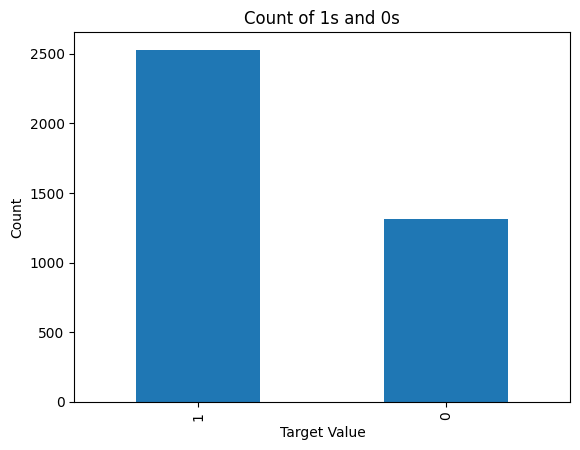

1    2529
0    1317
Name: target, dtype: int64


In [148]:
target_counts = df['target'].value_counts()

# Create a bar chart of the counts
target_counts.plot.bar()

# Add labels and title to the chart
plt.title('Count of 1s and 0s')
plt.xlabel('Target Value')
plt.ylabel('Count')

# Display the chart
plt.show()
print(target_counts)

<ipython-input-149-2d366cf5db0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.target -= 1
<ipython-input-149-2d366cf5db0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.target *= 40


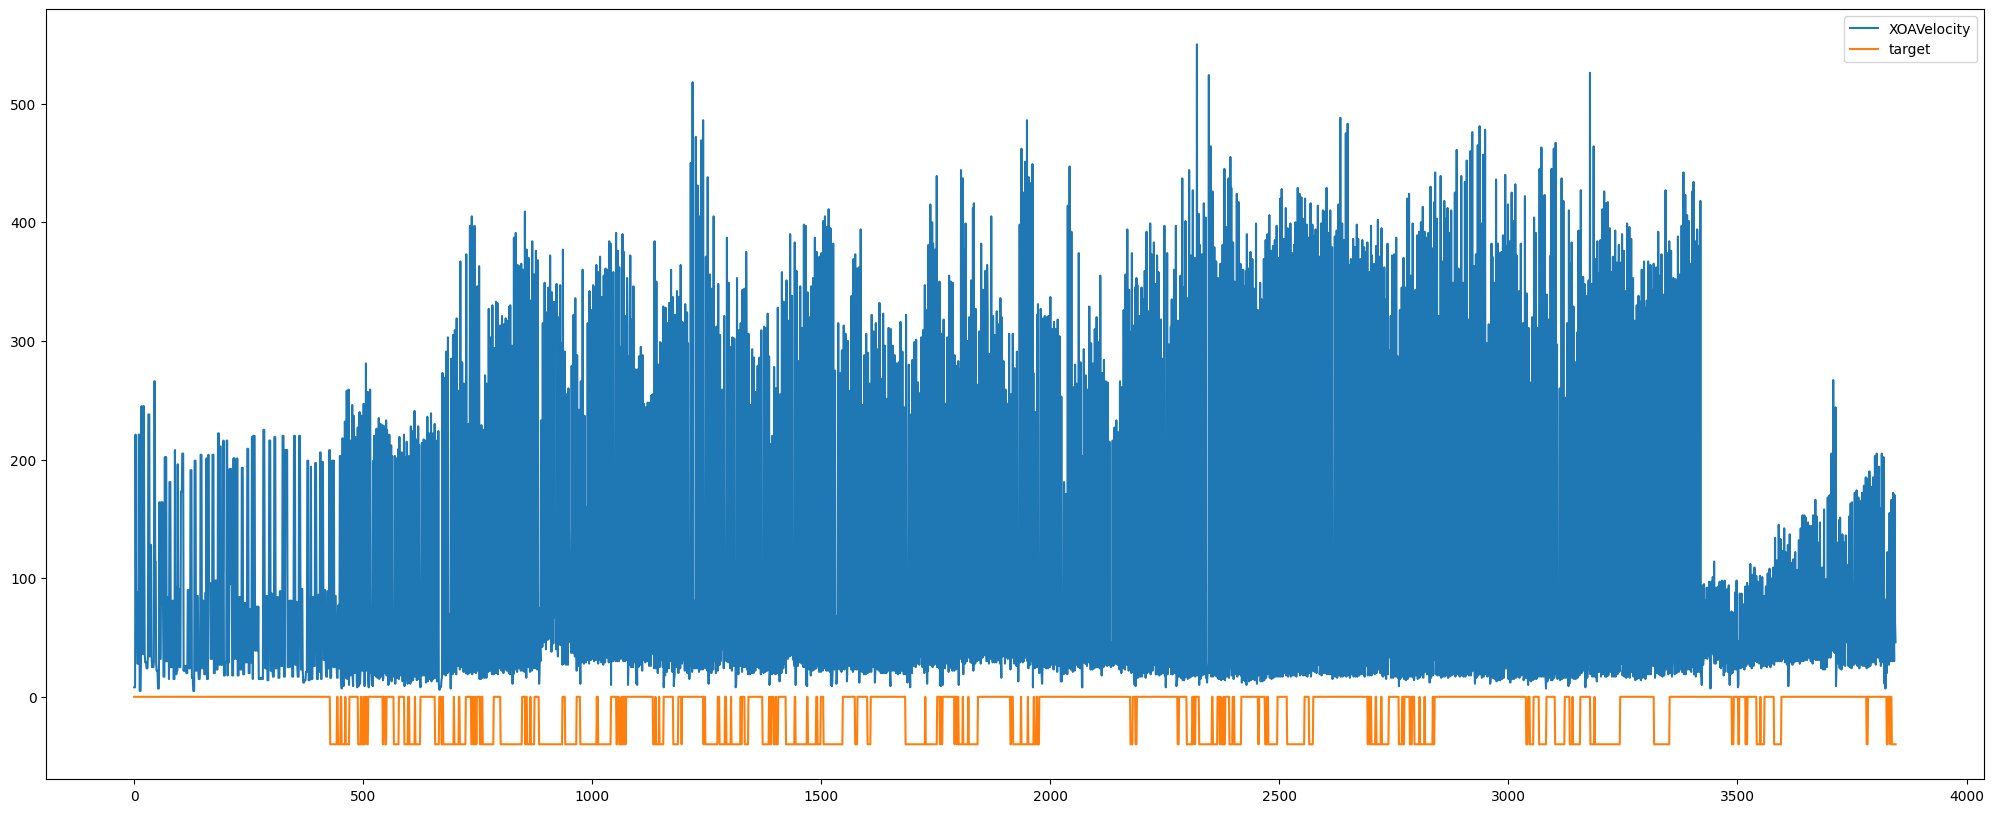

In [149]:
df1 = df.drop(['XCrestFactor','ZPeakmg','ZRMSmg'], axis=1)
df1 = df[['XOAVelocity','target']]
df1.target -= 1
df1.target *= 40
plt.figure(figsize=(25,10)) 
plt.plot(df1)
plt.legend(df1.columns)
plt.show()

In [150]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns)
df


,XOAVelocity,XPeakmg,XRMSmg,XKurtosis,XCrestFactor,XSkewness,XDeviation,XPeaktoPeakDisplacement,YOAVelocity,YPeakmg,YRMSmg,ZOAVelocity,ZPeakmg,ZRMSmg,target,target2
0,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,0.009756,0.021401,0.025862,0.025785,1.0,0.0
1,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,0.009756,0.021401,0.025862,0.025785,1.0,0.0
2,0.005505,0.020737,0.019544,0.028571,0.325556,0.269565,0.003889,0.017241,0.004769,0.010345,0.009756,0.021401,0.025862,0.025785,1.0,0.0
3,0.396330,0.327189,0.325733,0.049231,0.016142,0.221739,0.185556,0.396552,0.406995,0.300000,0.300000,0.112840,0.028515,0.028598,1.0,0.0
4,0.152294,0.520737,0.521173,0.038462,0.002306,0.265217,0.287778,0.155172,0.079491,0.275862,0.275610,0.258755,0.238727,0.238631,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3841,0.097248,0.198157,0.198697,0.027912,0.125475,0.265217,0.014444,0.068966,0.084261,0.124138,0.124390,0.293774,0.287135,0.286920,0.0,1.0
3842,0.045872,0.163594,0.162866,0.030110,0.162914,0.269565,0.207222,0.051724,0.049285,0.115517,0.114634,0.184825,0.086207,0.086263,0.0,1.0
3843,0.302752,0.361751,0.361564,0.046154,0.126967,0.269565,0.126111,0.379310,0.413355,0.360345,0.360976,0.883268,0.076923,0.076887,0.0,1.0
3844,0.106422,0.377880,0.377850,0.143736,0.412778,0.291304,0.323889,0.137931,0.287758,0.718966,0.719512,0.354086,0.132626,0.132677,0.0,1.0


In [151]:
from sklearn.model_selection import train_test_split
frames = df[['XOAVelocity', 'XPeakmg', 'XRMSmg', 'XKurtosis', 'XCrestFactor',
       'XSkewness', 'XDeviation', 'XPeaktoPeakDisplacement', 'YOAVelocity',
       'YPeakmg', 'YRMSmg', 'ZOAVelocity', 'ZPeakmg', 'ZRMSmg']].values
labels = df[['target', 'target2']].values
train_data,test_data, train_labels, test_labels =  train_test_split(frames, labels,train_size=0.7, random_state=42 )
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

2692
1154
2692
1154


In [152]:
def plotUsingAutoEncoder(model,df):

  denoised_all = []

  for _,frame in df.iterrows():
    row_array = frame.values[:14]
    encoded_data = model.encoder(np.array([row_array])).numpy()
    [values] = model.decoder(encoded_data).numpy()
    denoised_all.append(values)
  separated_XOAVelocity = [x[0] for x in denoised_all]
  separated_XPeakmg = [x[1] for x in denoised_all]
  separated_XRMSmg = [x[2] for x in denoised_all]
  separated_XKurtosis = [x[3] for x in denoised_all]
  separated_XCrestFactor = [x[4] for x in denoised_all]
  separated_XSkewness = [x[5] for x in denoised_all]
  separated_XDeviation = [x[6] for x in denoised_all]
  separated_XPeaktoPeakDisplacement = [x[7] for x in denoised_all]
  separated_YOAVelocity = [x[8] for x in denoised_all]
  separated_YPeakmg = [x[9] for x in denoised_all]
  separated_YRMSmg = [x[10] for x in denoised_all]
  separated_ZOAVelocity = [x[11] for x in denoised_all]
  separated_ZPeakmg = [x[12] for x in denoised_all]
  separated_ZRMSmg = [x[13] for x in denoised_all]
  
  df['separated_XOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XOAVelocity']) 
  df['separated_XPeakmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XPeakmg'])
  df['separated_XRMSmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XRMSmg']) 
  df['separated_XKurtosis'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XKurtosis']) 
  df['separated_XCrestFactor'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XCrestFactor']) 
  df['separated_XSkewness'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XSkewness']) 
  df['separated_XDeviation'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XDeviation']) 
  df['separated_XPeaktoPeakDisplacement'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_XPeaktoPeakDisplacement']) 
  df['separated_YOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_YOAVelocity'])
  df['separated_YPeakmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_YPeakmg']) 
  df['separated_YRMSmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_YRMSmg']) 
  df['separated_ZOAVelocity'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_ZOAVelocity']) 
  df['separated_ZPeakmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_ZPeakmg']) 
  df['separated_ZRMSmg'] = pd.DataFrame(separated_XOAVelocity, columns=['separated_ZRMSmg']) 
   
  scaler.fit(df.values)
  df = pd.DataFrame(scaler.inverse_transform(df.values), columns=df.columns)
  noise = df[['XOAVelocity']].values.flatten()
  seperated = df[['separated_XOAVelocity']].values.flatten()

  plt.figure(figsize=(20,5)) 
  plt.plot(noise)
  plt.plot(seperated, color="red")
  plt.legend(labels=["Input", "Reconstruction" ])
  plt.show()

#*_With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function_*



In [153]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])
    

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(4, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


85/85 [==============================] - 3s 11ms/step - loss: 0.6625 - accuracy: 0.6445 - val_loss: 0.6352 - val_accuracy: 0.6716


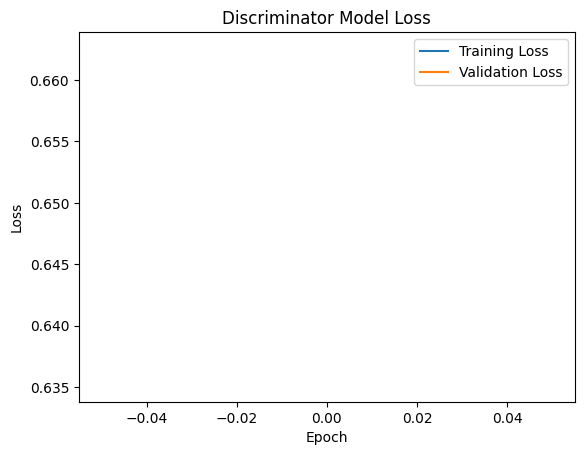

In [154]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [155]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

Epoch 0 Starting
Epoch 0 DONE
Epoch 1 Starting
Epoch 1 DONE
Epoch 2 Starting
Epoch 2 DONE
Epoch 3 Starting
Epoch 3 DONE
Epoch 4 Starting
Epoch 4 DONE
Epoch 5 Starting
Epoch 5 DONE
Epoch 6 Starting
Epoch 6 DONE
Epoch 7 Starting
Epoch 7 DONE
Epoch 8 Starting
Epoch 8 DONE
Epoch 9 Starting
Epoch 9 DONE


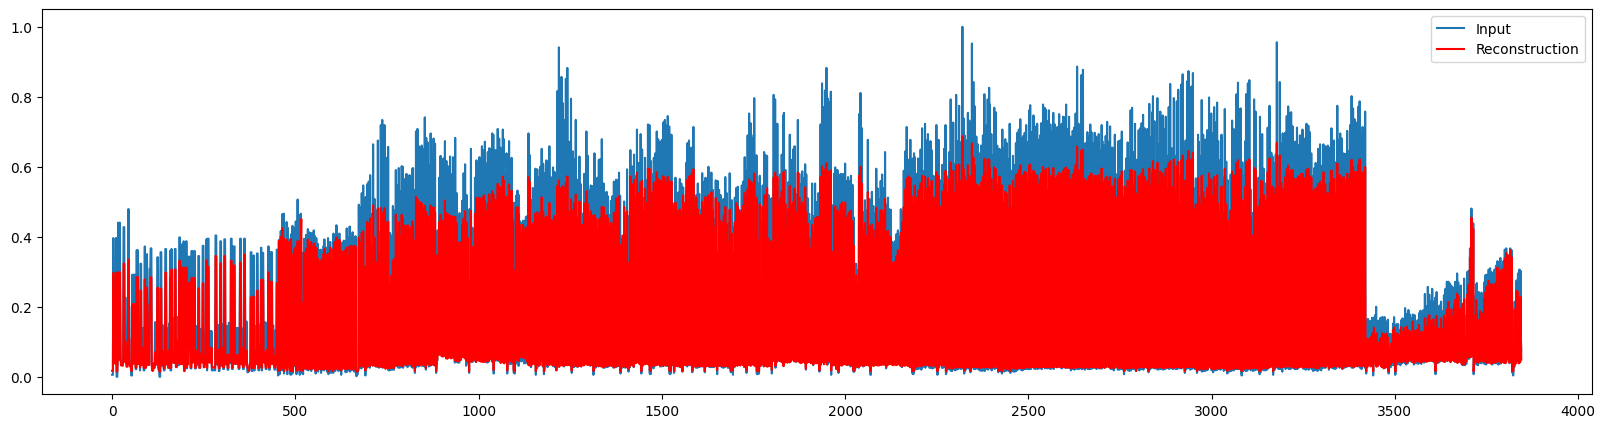

In [156]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

10


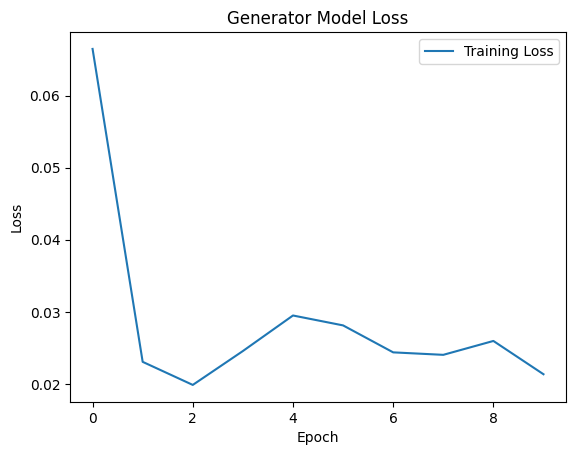

In [157]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [161]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3310].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise
length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

65
65
65
6.06035635610607


#*__With 1D 2 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*_With 1D 3 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten()
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*_With 1D 3 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten()
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(6,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax'),
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*_With 1D 2 CNN Layers & 2 Dense Layer - Leaky ReLU activation function_*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(6, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

# *_With 1D 4 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=6, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*_With 1D 4 CNN Layers - Leaky ReLU activation function_*



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(3,activation='LeakyReLU')
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 3 CNN Layers & 2 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(5,activation='LeakyReLU'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(), 
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(3, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#*__With 1D 4 CNN Layers & 1 Dense Layer - Leaky ReLU activation function__*



In [ ]:
from keras.layers.activation.leaky_relu import LeakyReLU
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

class Discriminator(Model):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
        tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
        tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
        tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"), 
        tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
        tf.keras.layers.Dense(2,activation='softmax')
    ])

  def call(self, x):
    return self.model(x)

class Generator(Model):
  def __init__(self):
    super(Generator, self).__init__()
    self.encoder = tf.keras.Sequential([
      tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
      tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
      tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
      tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(2, activation="LeakyReLU")
      ])

    self.decoder = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="LeakyReLU"),
      tf.keras.layers.Dense(5, activation="LeakyReLU"),
      tf.keras.layers.Dense(8, activation="LeakyReLU"),
      tf.keras.layers.Dense(10, activation="LeakyReLU"),
      tf.keras.layers.Dense(14, activation="sigmoid")])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

generator = Generator()
discriminator = Discriminator()

generator.compile(optimizer='adam',loss = 'mae')
discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

discriminator.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Discriminator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [ ]:
max_epochs = 10
learning_rate = 0.001
generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
step = 0
gen_losses = []
for epoch in range(max_epochs):
  print("Epoch " + str(epoch) +" Starting")

  for i in range (len(train_labels)):
    with tf.GradientTape() as gen_tape:
      output = generator(np.array([train_data[i]]))
      disc_output = discriminator(np.array(output))
      mae = tf.keras.losses.MeanAbsoluteError()
      gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
  gen_losses.append(gen_loss)
  
  print("Epoch " + str(epoch) +" DONE")

plotUsingAutoEncoder(generator,df)

In [ ]:
plt.plot(gen_losses, label='Training Loss')
plt.title('Generator Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
print(len(gen_losses))

In [ ]:
#Calculate SNR Value

noise =[]
generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
original = df['XDeviation'][3245:3318].values.tolist() #original signal
mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

length = len(original)
for i in range(length):
  noise.append(original[i] - mixed[i])

snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
print(snr)

#**_With 1D 5 CNN Layers - Leaky ReLU activation function_**



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=3, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))

In [ ]:
# #Calculate SNR Value

# noise =[]
# generated = df['separated_XDeviation'][3179:3244].values.tolist()   #generated signal
# original = df['XDeviation'][3245:3318].values.tolist() #original signal
# mixed = df['XDeviation'][3179:3244].values.tolist() # with noise

# length = len(original)
# for i in range(length):
#   noise.append(original[i] - mixed[i])

# snr = 10 * np.log10(np.mean(np.square(generated))/np.mean(np.square(noise)))
# print(snr)

#**_With 1D 5 CNN Layers - Leaky ReLU activation function_**



In [ ]:
# from keras.layers.activation.leaky_relu import LeakyReLU
# from sklearn.metrics import accuracy_score, precision_score, recall_score
# from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, losses
# from tensorflow.keras.models import Model

# class Discriminator(Model):
#   def __init__(self):
#     super(Discriminator,self).__init__()
#     self.model = tf.keras.Sequential([
#         tf.keras.layers.Input(shape=(14,)),
#         tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#         tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"),  # Replace 2nd Dense layer with Conv1D
#         tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"),  # Add another Conv1D layer
#         tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#         tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="softmax"), 
#         tf.keras.layers.Flatten(),  # Flatten the output of Conv1D for the next Dense layer
#     ])

#   def call(self, x):
#     return self.model(x)

# class Generator(Model):
#   def __init__(self):
#     super(Generator, self).__init__()
#     self.encoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((14, 1)),  # Add a Reshape layer to prepare input for Conv1D
#       tf.keras.layers.Conv1D(filters=20, kernel_size=3, activation="LeakyReLU"), 
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="LeakyReLU"), # Replace Dense layer with Conv1D
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Flatten(), 
#       ])

#     self.decoder = tf.keras.Sequential([
#       tf.keras.layers.Reshape((2, 1)),
#       tf.keras.layers.Conv1D(filters=2, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=5, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=10, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=12, kernel_size=3, activation="LeakyReLU"),
#       tf.keras.layers.Conv1D(filters=14, kernel_size=3, activation="sigmoid"),
#       tf.keras.layers.Flatten()])

#   def call(self, x):
#     encoded = self.encoder(x)
#     decoded = self.decoder(encoded)
#     return decoded

# generator = Generator()
# discriminator = Discriminator()

# generator.compile(optimizer='adam',loss = 'mae')
# discriminator.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'])

# discriminator.compile(optimizer='adam',
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])

# history = discriminator.fit(train_data, train_labels, epochs=300, validation_data=(test_data, test_labels))


In [ ]:
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Discriminator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

In [ ]:
# max_epochs = 10
# learning_rate = 0.001
# generator_optimizer = tf.optimizers.Adam(learning_rate)

In [ ]:
# step = 0
# gen_losses = []
# for epoch in range(max_epochs):
#   print("Epoch " + str(epoch) +" Starting")

#   for i in range (len(train_labels)):
#     with tf.GradientTape() as gen_tape:
#       output = generator(np.array([train_data[i]]))
#       disc_output = discriminator(np.array(output))
#       mae = tf.keras.losses.MeanAbsoluteError()
#       gen_loss = mae(train_data[i], output[0]) * disc_output[0][0]
  
#     gradients_of_generator = gen_tape.gradient(gen_loss, generator.variables)
#     generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.variables))
#   gen_losses.append(gen_loss)
  
#   print("Epoch " + str(epoch) +" DONE")

# plotUsingAutoEncoder(generator,df)

In [ ]:
# plt.plot(gen_losses, label='Training Loss')
# plt.title('Generator Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# print(len(gen_losses))